# making a new transformer class

- countvectorize category column to make separate into separate individual categories
- multiply price by category
- "standard scale" it
    - take average of category to get average price
    - see whether an individual listing or group of listings is disproportionately high or low
- feature engineer price * ratings? or ratings * category?

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline

In [24]:
data = pd.read_csv('../data/data_income_jerry.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,alias,categories,city,id,latitude,longitude,price,rating,review_count,zip_code,avg_agi
0,重庆特色小面-chongqing-special-noodles-san-gabriel-3,"['noodles', 'chinese']",San Gabriel,mm6l24khOfXhKqn4pKVojA,34.103070,-118.091840,1,4.0,204.0,91776,37.21102
1,yung-ho-cafe-san-gabriel-2,"['taiwanese', 'chinese', 'breakfast_brunch']",San Gabriel,zO8V4fi49QQMn4Sa_0OS9g,34.081429,-118.084785,1,3.0,263.0,91776,37.21102
2,yun-nan-168-san-gabriel,['chinese'],San Gabriel,6J_4QelYHplaLHzof1VEyg,34.080849,-118.090324,1,3.0,4.0,91776,37.21102
3,yum-cha-cafe-san-gabriel,"['dimsum', 'hotdogs']",San Gabriel,KD_fdBnwN3TbJYJ8mcvq4Q,34.078899,-118.092026,1,3.0,138.0,91776,37.21102
4,yuk-dae-jang-san-gabriel-2,['korean'],San Gabriel,DwvljRkxkMEljQBYX-MeTw,34.102080,-118.109870,2,4.5,158.0,91776,37.21102


In [25]:
data.shape

(28476, 11)

In [49]:
X = data.drop(columns='avg_agi')
y = data['avg_agi']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=111)

In [51]:
# https://stackoverflow.com/questions/46778392/
# https://stackoverflow.com/questions/34734940/

'''
use function for both X_train and X_test
you can save as a different DF or overwrite

maybe this can go in a markdown cell:

    We first use CountVectorizer() to create dummy columns for
    each category. We multiply these columns the price by the 
    dummy categories so that we can get a price inside the
    category column.
    
    e.g. if a Korean restaurant has a price of '3', then we 
    want that row to have a '3' in the 'korean' column.
    
    This allows us to standard scale each category column so
    that we can assess the relative price of each business
    listing given its category. That way, if one area has
    relatively expensive Korean restaurants, and another area
    has relatively inexpensive jewelry stores, those scaled
    factors may have an effect in our ability to model.
    
'''

def category_pricer(df):
    '''
    Adds scaled price columns to a Yelp Business DataFrame.
    
    Arguments:
        df (pandas.DataFrame):      the DataFrame that contains all
                                    Yelp businesses. Must include
                                    'category' and 'price' column.
                                    
    Returns:
        'price_sc':                 standard scaled price
        'adj_price':                the average price of 
                                    category-scaled prices

    Goal:   to standard scale the price of a business listing
            given its category.
    '''
    
    # instantiate CountVectorizer() and fit 'category'
    cvect = CountVectorizer()
    u = cvect.fit_transform(df['category']).toarray()
    
    # multiply 'price' by vectorized columns
    v = df['price'].values
    for i in range(len(df)):
        u[i] = u[i] * v[i]
        
    # make into a DataFrame since that allows us to make
    # quicker row calculations
    categories = cvect.get_feature_names()
    C = pd.DataFrame(u, columns=categories)
    
    # replace 0 with NaN so that it doesn't mess with
    # standard scaling or finding the average, since the
    # 0 values represent missing values anyway
    C.replace(0, np.NaN, inplace=True)
    
    # standard scale each category
    sc = StandardScaler()
    S = pd.DataFrame(sc.fit_transform(C), columns=categories)
    
    df['price_sc'] = sc.fit_transform(df['price'])
    
    # right now if a listing belongs to multiple categories,
    # it will take the average of the scaled category scores.
    df['adj_price'] = S.mean(axis=1)
    
    return df

In [52]:
X_train = category_pricer(X_train)

KeyError: 'category'

In [31]:
cvect = CountVectorizer()



<28476x357 sparse matrix of type '<class 'numpy.int64'>'
	with 57560 stored elements in Compressed Sparse Row format>

In [32]:
# https://stackoverflow.com/questions/46778392/

u = cvect.fit_transform(X['categories']).toarray()

In [33]:
v = X['price'].values
v

array([1, 1, 1, ..., 2, 2, 1])

In [47]:
start = time.time()
for i in range(len(data)):
    u[i] = u[i] * v[i]
    
end = time.time()

print((end - start)/60)

0.004271515210469564


In [35]:
cvect_df = pd.DataFrame(u, columns=cvect.get_feature_names())

In [36]:
cvect_df.replace(0, np.NaN, inplace=True)

In [37]:
sc = StandardScaler()

In [38]:
sc_df = pd.DataFrame(sc.fit_transform(cvect_df), columns=cvect.get_feature_names())
sc_df

,acaibowls,accessories,acupuncture,afghani,african,airportlounges,amusementparks,antiques,appliances,arabian,...,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539331,NaN
28472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
scprice = sc.fit_transform(data[['price']])

In [40]:
X['price_sc'] = scprice

In [41]:
# https://stackoverflow.com/questions/34734940/

sc_df['avg'] = sc_df.mean(axis=1)

In [43]:
X['price_2'] = sc_df['avg']

In [44]:
X.head()

,alias,categories,city,id,latitude,longitude,price,rating,review_count,zip_code,price_sc,price_2
0,重庆特色小面-chongqing-special-noodles-san-gabriel-3,"['noodles', 'chinese']",San Gabriel,mm6l24khOfXhKqn4pKVojA,34.103070,-118.091840,1,4.0,204.0,91776,-0.832484,-0.886187
1,yung-ho-cafe-san-gabriel-2,"['taiwanese', 'chinese', 'breakfast_brunch']",San Gabriel,zO8V4fi49QQMn4Sa_0OS9g,34.081429,-118.084785,1,3.0,263.0,91776,-0.832484,-0.858043
2,yun-nan-168-san-gabriel,['chinese'],San Gabriel,6J_4QelYHplaLHzof1VEyg,34.080849,-118.090324,1,3.0,4.0,91776,-0.832484,-0.763831
3,yum-cha-cafe-san-gabriel,"['dimsum', 'hotdogs']",San Gabriel,KD_fdBnwN3TbJYJ8mcvq4Q,34.078899,-118.092026,1,3.0,138.0,91776,-0.832484,-0.944301
4,yuk-dae-jang-san-gabriel-2,['korean'],San Gabriel,DwvljRkxkMEljQBYX-MeTw,34.102080,-118.109870,2,4.5,158.0,91776,0.902172,0.450836


In [48]:
# https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65
# https://stackoverflow.com/questions/44408861/

class CategoryPricer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        cvect = CountVectorizer()
        sc = StandardScaler()
        
        categories = cvect.get_feature_names()
        
        C = pd.DataFrame(cvect.fit_transform(X['categories']).toarray(),
                         columns=categories)
        
        p = X['price'].values
        
        for i in range(len(C)):
            C[i] = C[i] * p[i]
        
        C.replace(0, np.NaN, inplace=True)
        
        S = pd.DataFrame(sc.fit_transform(C),
                         columns=categories)
        
        X['price_2'] = S.mean(axis=1)
        X['price_sc'] = sc.fit_transform(X[['price']])
        
        return X.values

IndentationError: expected an indented block (<ipython-input-48-0ea9c143eff9>, line 8)

In [46]:
# Don't uncomment this unless you actually want to create a new csv

X.to_csv('../data/data_income_scaled_train_jerry.csv')

In [118]:
data_pivot = data.pivot_table(index='zip_code', values=['avg_agi', 'price', 'price_2', 'price_sc'])
data_pivot

,avg_agi,price,price_2,price_sc
zip_code,,,,
90001,25.152933,1.279570,-0.187469,-0.347526
90002,24.410496,1.095238,-0.403942,-0.667278
90003,23.404622,1.197183,-0.305208,-0.490439
90004,59.128947,1.529032,-0.054012,0.085205
90005,45.821128,1.639456,0.080057,0.276752
...,...,...,...,...
93551,66.457763,1.531746,0.178310,0.089913
93552,38.560511,1.125000,-0.445561,-0.615652
93553,48.930263,1.000000,-1.085897,-0.832484


In [121]:
data_pivot_2 = data.pivot_table(index='zip_code', values='price', aggfunc='count')
data_pivot_2

,price
zip_code,
90001,93
90002,21
90003,71
90004,155
90005,147
...,...
93551,126
93552,32
93553,2


In [122]:
data_pivot_50 = data_pivot[data_pivot_2['price'] >= 50]

In [1]:
len(data_pivot_50)

NameError: name 'data_pivot_50' is not defined

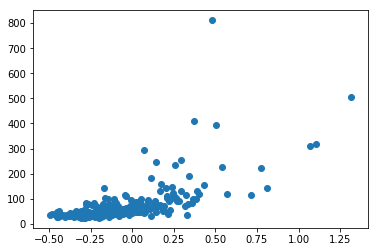

In [124]:
plt.scatter(x=data_pivot_50['price_2'], y=data_pivot_50['avg_agi'])

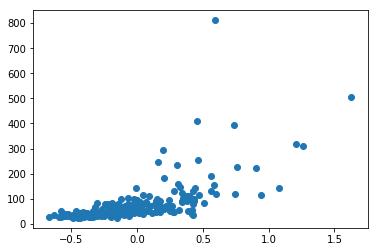

In [125]:
plt.scatter(x=data_pivot_50['price_sc'], y=data_pivot_50['avg_agi'])

In [106]:
from sklearn.linear_model import LinearRegression

In [126]:
lr = LinearRegression()

In [128]:
lr.fit(data_pivot_50[['price_2']], data_pivot_50['avg_agi'])
print(lr.score(data_pivot_50[['price_2']], data_pivot_50['avg_agi']))

0.43045282538684915


In [129]:
lr.fit(data_pivot_50[['price_sc']], data_pivot_50['avg_agi'])
print(lr.score(data_pivot_50[['price_sc']], data_pivot_50['avg_agi']))

0.41395180035664897


In [ ]:
# https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65
# https://stackoverflow.com/questions/44408861/

class CategoryPricer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        cvect = CountVectorizer()
        sc = StandardScaler()
        
        categories = cvect.get_feature_names()
        
        C = pd.DataFrame(cvect.fit_transform(X['categories']).toarray(),
                         columns=categories)
        C.replace(0, np.NaN, inplace=True)
        
        S = pd.DataFrame(sc.fit_transform(C),
                         columns=categories)
        
        
        
        X = X.drop('categories', axis=1)
        X = X.join(C)

In [3]:
data[data['zip_code'] == 92845]

,alias,categories,city,id,latitude,longitude,price,rating,review_count,zip_code,avg_agi
28475,a-bite-of-jersey-garden-grove-2,"['cheesesteaks', 'sandwiches', 'chicken_wings']",Garden Grove,Gr4TtbfG10vmgOkFdnadYw,33.780935,-118.041427,1,4.0,161.0,92845,72.275806


In [4]:
DESCRIBE = data.describe()
DESCRIBE

,latitude,longitude,price,rating,review_count,zip_code,avg_agi
count,28476.000000,28476.000000,28476.000000,28476.000000,28476.000000,28476.000000,28476.000000
mean,34.048928,-118.242851,1.479913,3.586792,242.074062,90819.865290,75.439776
std,0.160146,0.204438,0.576493,0.812550,420.322936,773.298386,73.385458
min,33.167953,-119.174788,1.000000,0.000000,0.000000,90001.000000,23.390537
25%,33.948473,-118.385123,1.000000,3.000000,37.000000,90064.000000,39.288225
50%,34.051688,-118.263453,1.000000,4.000000,108.000000,90701.000000,55.424814
75%,34.131785,-118.122028,2.000000,4.000000,281.000000,91361.000000,85.202214
max,34.857667,-117.225868,4.000000,5.000000,16662.000000,93591.000000,811.582132


In [5]:
MEAN = DESCRIBE.loc['mean', 'price']
STDEV = DESCRIBE.loc['std', 'price']

In [6]:
def businesss_scaler(df, zipcode):
    
    mean = df[df['zip_code'] == zipcode]['price'].mean()
    agi = df[df['zip_code'] == zipcode]['avg_agi'].mean()
    
    count = df[df['zip_code'] == zipcode]['price'].count()
    
    z = (mean - MEAN) / STDEV
    
    return z, agi, count

In [7]:
zips = data['zip_code'].unique()
len(zips)

340

In [8]:
prices = []
agis = []
zs = []
    
for z in zips:
    x, y, c = businesss_scaler(data, z)
    if c > 50:
        prices.append(x)
        agis.append(y)
        zs.append(z)

In [9]:
prices

[-0.0965674455466888,
 -0.28973359270446297,
 0.24912085516184282,
 0.008876132727982829,
 0.11590084988737036,
 0.2571197196634542,
 0.7615110420216531,
 -0.02456140354353931,
 0.24271193236451424,
 -0.16013370960342266,
 0.0852036777758422,
 0.004936244008095692,
 -0.3916251319162794,
 -0.3029519210944526,
 0.003868124825918409,
 0.902156357036994,
 -0.2781043277309178,
 -0.15504146450829975,
 1.0803070893897588,
 0.40234899463784507,
 0.024136015974146014,
 0.4034515108784311,
 0.09606565940985443,
 0.02227383073329161,
 0.1457031088592459,
 -0.14668699989911357,
 0.2735001167670814,
 0.3405869337743022,
 -0.4459982169442525,
 -0.5458788862513848,
 -0.013340461998048498,
 0.3155680061678592,
 0.34536297002152927,
 -0.5170827308450816,
 -0.055501499716767606,
 0.4618283323351192,
 0.41787003545286766,
 -0.3867667960781319,
 -0.010371776877705538,
 -0.26252079920909044,
 -0.17767676795937573,
 0.24134662299666249,
 0.42410994510821093,
 -0.391462698584333,
 0.3831905157030655,
 -0.089

In [10]:
summary_df = pd.DataFrame()

In [11]:
summary_df['zip_code'] = zs
summary_df['price'] = prices
summary_df['avg_agi'] = agis

In [12]:
summary_df = summary_df.sort_values(by='price')

In [13]:
summary_df.shape

(223, 3)

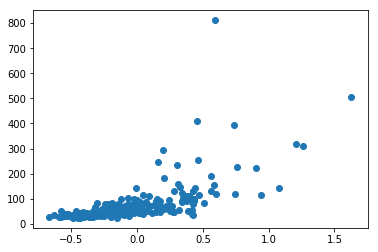

In [14]:
plt.scatter(x=summary_df['price'], y=summary_df['avg_agi'])

In [15]:
df = data.copy()
df.drop(['alias', 'city', 'id'], axis=1, inplace=True)

In [16]:
df['zip_code'] = df['zip_code'].astype(str)

In [17]:
df = df.dropna(axis=0, how='any')

In [25]:
df[df['zip_code'] == '90021']

,categories,latitude,longitude,price,rating,review_count,zip_code,avg_agi
11778,"['mexican', 'bars']",34.039080,-118.240428,2,4.0,1082.0,90021,73.61
11779,['japanese'],34.028189,-118.239372,1,2.0,31.0,90021,73.61
11780,['icecream'],34.031520,-118.236490,2,4.5,42.0,90021,73.61
11781,"['grocery', 'breakfast_brunch', 'markets']",34.036139,-118.231635,2,4.0,335.0,90021,73.61
11782,"['bbq', 'foodstands', 'sandwiches']",34.031520,-118.236490,2,4.5,62.0,90021,73.61
...,...,...,...,...,...,...,...,...
11872,['persian'],34.026611,-118.242798,1,4.0,59.0,90021,73.61
11873,"['italian', 'seafood', 'supperclubs']",34.031496,-118.238998,3,4.0,65.0,90021,73.61
11874,"['mexican', 'foodtrucks']",34.031748,-118.231928,1,4.5,39.0,90021,73.61
11875,"['convenience', 'coffee']",34.026867,-118.238764,1,2.5,12.0,90021,73.61


# use scipy cKDTree to calculate nearest neighbor distances

In [19]:
# https://stackoverflow.com/questions/12923586/
# https://stackoverflow.com/questions/36798782/

coords = df.copy()
coords = coords[['latitude', 'longitude']]

In [20]:
temp_point = list(coords.iloc[4])

In [21]:
# making the tree

distance_tree = cKDTree(coords)

In [22]:
# returns six closest points, including itself
# first array shows distances
# second array appears to show which indices are closest?

_, idx = distance_tree.query(temp_point, k=20)
for i in idx:
    print(data.iloc[i])

alias           yuk-dae-jang-san-gabriel-2
categories                      ['korean']
city                           San Gabriel
id                  DwvljRkxkMEljQBYX-MeTw
latitude                           34.1021
longitude                          -118.11
price                                    2
rating                                 4.5
review_count                           158
zip_code                             91776
avg_agi                             37.211
Name: 4, dtype: object
alias           half-and-half-good-old-time-san-gabriel
categories                   ['taiwanese', 'bubbletea']
city                                        San Gabriel
id                               QhhWJVDP4L805y_YgwM3BQ
latitude                                        34.1021
longitude                                       -118.11
price                                                 1
rating                                                4
review_count                                        209


In [23]:
coords[KDTree(coords).query(list(coords.iloc[0]))[1]]

KeyError: 0

# use CountVectorizer

In [ ]:
X = df[['categories', 'price', 'rating', 'review_count', 'zip_code']]
y = df['avg_agi']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

In [ ]:
cvect = CountVectorizer()

In [ ]:
V_train = cvect.fit_transform(X_train['categories'])

In [ ]:
categories = list(cvect.get_feature_names())

In [ ]:
categories

In [ ]:
V_df = pd.DataFrame(data=V_train.toarray(), columns=categories)

In [ ]:
V_df.shape

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.join(V_df)

In [ ]:
X_train[X_train['zip_code'] == '90001']

In [ ]:
# https://stackoverflow.com/questions/42935334/

X_train.iloc[:, 5:-1] = X_train.iloc[:, 5:-1].mul(X_train.iloc[:, 1], axis=0)

In [ ]:
X_train_nan = X_train.replace(0, np.NaN)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
X_train_nan.describe().T[X_train_nan.describe().T['count'] > 200].sort_values(by='count', ascending=False)

In [ ]:
X_train_nan.describe().T[X_train_nan.describe().T['count'] > 200].sort_values(by='mean', ascending=False)

In [ ]:
X_train_nan[X_train_nan['zip_code'] == '90001'].describe().T.sort_values(by='mean', ascending=False)

In [ ]:
X_train[X_train['zip_code'] == '90001']

In [ ]:
def numeric_filter(df):
    features = ['price', 'rating', 'review_count']
    return df[features]

Numeric = FunctionTransformer(numeric_filter, validate=False)

In [ ]:
def category_filter(df):
    return df['categories']

Categories = FunctionTransformer(category_filter, validate=False)

In [ ]:
numeric_transformer = Pipeline([
    ('num_filt', Numeric),
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('cat_filt', Categories),
    ('cvect', CountVectorizer())
])

In [ ]:
pipe = Pipeline([
    ('union', FeatureUnion([
        ('num', numeric_transformer),
        ('cat', categorical_transformer)
    ])),
    ('rfr', RandomForestRegressor(n_estimators=10,
                                  verbose=1))
])

In [ ]:
pipe.fit_transform(X_train, y_train)

In [ ]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

In [ ]:
list(pipe.named_steps['rfr'].feature_importances_)

In [ ]:
pipe.named_steps['union'].get_feature_names()

In [ ]:
sns.heatmap(df.corr(),
           annot = True,
           cmap = 'coolwarm')

In [ ]:
plt.figure(figsize=(21, 15))
plt.scatter(df['longitude'], df['latitude'], s=2, alpha=0.2)

# KMeans Clustering

In [ ]:
df._get_numeric_data()

In [ ]:
# Try to pick interesting columns for clustering

sns.pairplot(df._get_numeric_data())

In [ ]:
# Function to create KMeans Clustering for 2 features from original dataframe

def kmean(var1, var2):
    features = [var1, var2]
    X = df[features]

    sc = StandardScaler()
    X = sc.fit_transform(X)

    km = KMeans(n_clusters=3,
           random_state=42)
    km.fit(X)

    df_copy = df.copy()
    df_copy['cluster'] = km.labels_

    print(f' Cluster Centers: \n{km.cluster_centers_}')

    centroids = pd.DataFrame(
        sc.inverse_transform(km.cluster_centers_),
        columns = features
    )

    print(f' Centroids for Plot: \n{centroids}')


    # Visualizing Clusters
    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["red", "green", "blue"]
    df_copy['color'] = df_copy['cluster'].map(lambda p: colors[p])

    ax = df.plot(    
        kind="scatter", 
        x=var1, y=var2,
        figsize=(10,8),
        c = df_copy['color']
    )

    centroids.plot(
        kind="scatter", 
        x=var1, y=var2, 
        marker="*", c=["r", "g", "b"], s=550,
        ax=ax
    );

In [ ]:
kmean('latitude', 'longitude')

In [ ]:
kmean('longitude', 'zip_code')

In [ ]:
kmean('latitude', 'zip_code')

# Linear Regression Model
- Only price, rating, dummied zip_code as features.
- Target: ave_agi

In [ ]:
df['zip_code'] = df['zip_code'].astype(int).astype(str)

In [ ]:
df_dummied_city = pd.get_dummies(data=df,columns=['zip_code'])

In [ ]:
df_dummied_city._get_numeric_data().head(2)

In [ ]:
features = df_dummied_city._get_numeric_data().drop(columns=['ave_agi', 'review_count', 'latitude', 'longitude', 'price*rating'])

X = features
y = df_dummied_city['ave_agi']


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

# Linear Regression Model
- This was really really really bad - Aerika

In [ ]:
df_dummied_city = pd.get_dummies(data=df,columns=['city'])

In [ ]:
df_dummied_city.head(2)

In [ ]:
features = df_dummied_city._get_numeric_data().drop(columns=['ave_agi'])

X = features
y = df_dummied_city['ave_agi']


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

Jerry's code from previous project, trying to use it to perform a bunch of different models for this project  
Still need to tweak functions so they can be used for this project.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# numeric columns that seem like continuous features.
numeric_features = ['price', 'rating', 'review_count', 'ave_agi']

# columns that should get dummied out
categorical_features = ['zip_code']

In [ ]:
# transforms numeric columns
# just comment out whichever transformers you want to leave out

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, 
                                interaction_only=False)),
    ('power', PowerTransformer()),
#     ('imputer', SimpleImputer(strategy=)),
    ('scaler', StandardScaler())
])

In [ ]:
# transforms categorical columns into dummy columns

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
filter_transformer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# put alias as keys to dictionary
# put instantiation of model, including parameters you don't want to gridsearch, as value

est_dict = {
    'logreg': LogisticRegression(solver='lbfgs'),
    'knn': KNeighborsClassifier(),
    'rand': RandomForestClassifier(n_estimators=100, random_state=111),
    'extra': ExtraTreesClassifier(n_estimators=100, random_state=111),
    'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=111)
}

# list of aliases so we can loop through models
estimators = ['logreg', 'knn', 'rand', 'extra', 'ada']

In [ ]:
'''
to access parameters, follow this format:

grid_params = {'filter__num__poly__param': [],
    'estimatoralias__param': []
    }
'''

pipe = Pipeline([
    ('filter', filter_transformer),
    ('estimator', Estimator())
])